# 📊 Classification Metrics (Basic to Advanced)

In classification problems, especially binary classification, evaluating the performance of a model is crucial. Here are the most commonly used **classification metrics**:

---

## ✅ Confusion Matrix

|                        | Predicted Positive | Predicted Negative |
|------------------------|--------------------|--------------------|
| **Actual Positive**    | True Positive (TP) | False Negative (FN)|
| **Actual Negative**    | False Positive (FP)| True Negative (TN) |

- **True Positive (TP):** Correctly predicted positive class.
- **True Negative (TN):** Correctly predicted negative class.
- **False Positive (FP):** Incorrectly predicted as positive (Type I error).
- **False Negative (FN):** Incorrectly predicted as negative (Type II error).

---

## 🎯 Accuracy

**Definition:** Overall correctness of the model.

$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$

> ⚠️ **Warning:** Accuracy is misleading when classes are imbalanced (e.g. 95% class A, 5% class B).

---

## ❗ Type of Errors

- **Type I Error (False Positive):** Predicting positive when actual is negative.
- **Type II Error (False Negative):** Predicting negative when actual is positive.

---

## 🔎 Precision

**Definition:** Of all predicted positive cases, how many were actually positive?

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- Important when **false positives are costly** (e.g., spam filters).

---

## 📢 Recall (Sensitivity / True Positive Rate)

**Definition:** Of all actual positive cases, how many were correctly predicted?

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- Important when **false negatives are costly** (e.g., disease detection).

---

## ⚖️ F1 Score

**Definition:** Harmonic mean of precision and recall. Best used when you want a balance between them.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## 📉 ROC Curve (Receiver Operating Characteristic)

- **X-axis:** False Positive Rate (FPR)  
- **Y-axis:** True Positive Rate (Recall)

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

- **AUC (Area Under Curve):** Measures overall ability of the model to distinguish between classes.

---

## 🎯 Precision-Recall (PR) Curve

- Used when **classes are imbalanced**
- **X-axis:** Recall  
- **Y-axis:** Precision  
- PR-AUC is more informative than ROC-AUC in case of imbalance.

---

## 🧠 Advanced Metrics

### ✅ Specificity (True Negative Rate)

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- Measures how well the model identifies negative class.

---

### ⚖️ Balanced Accuracy

$$
\text{Balanced Accuracy} = \frac{\text{Sensitivity} + \text{Specificity}}{2}
$$

- More appropriate in imbalanced datasets.

---

## 🛠️ Metric Selection Guide

| Metric        | Use-case Example                        |
|---------------|-----------------------------------------|
| Accuracy      | Balanced datasets                       |
| Precision     | Spam detection (minimize false alarms)  |
| Recall        | Disease detection (don't miss positives)|
| F1 Score      | Balance between precision & recall      |
| ROC-AUC       | Overall binary classifier performance   |
| PR-AUC        | Imbalanced data scenario                |

---

## 📌 Summary Table

| Metric         | Best For                                   |
|----------------|---------------------------------------------|
| Accuracy       | General performance in balanced datasets    |
| Precision      | When false positives are costly             |
| Recall         | When false negatives are costly             |
| F1 Score       | When tradeoff between Precision and Recall  |
| ROC-AUC        | General performance across thresholds       |
| PR-AUC         | Performance in imbalanced datasets          |
| Specificity    | Importance of identifying true negatives    |
| Balanced Accuracy | For imbalanced datasets                  |

---


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, roc_curve, auc,
    precision_recall_curve, cohen_kappa_score,
    classification_report
)

# Create sample binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_informative=2,
                           n_redundant=0, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC/PR curves


# 📊 1. Confusion Matrix


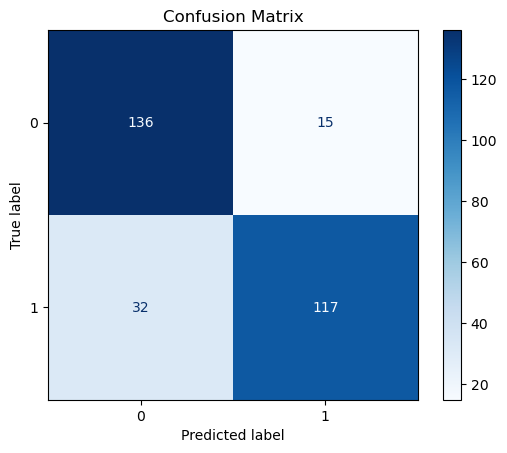

In [2]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


# ✅ 2. Basic Metrics

In [3]:
# Binary classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8433333333333334
Precision: 0.8863636363636364
Recall: 0.785234899328859
F1 Score: 0.8327402135231317


# 📈 3. ROC Curve & AUC

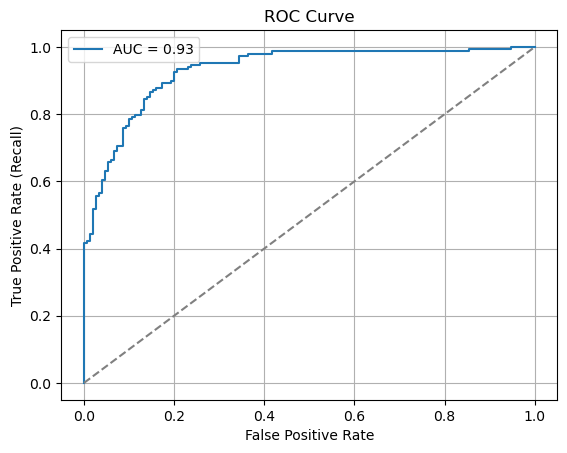

In [4]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


# 📉 4. Precision-Recall Curve

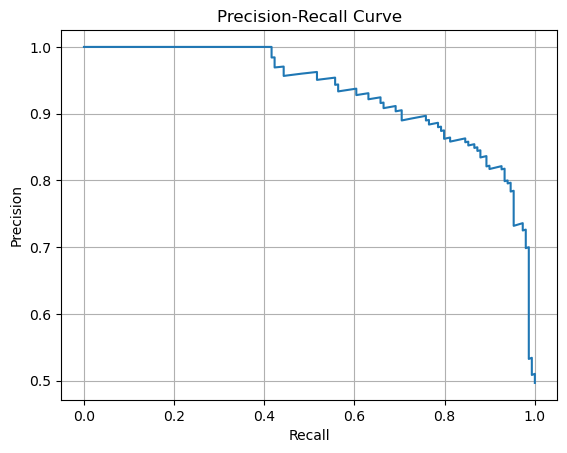

In [5]:
# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(y_test, y_prob)

plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()


# 🧠 5. Cohen’s Kappa

In [6]:
# Cohen’s Kappa
print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen’s Kappa Score: 0.6864157993061115


# 🔁 6. Multi-Class Metrics (Macro, Micro, Weighted)

In [7]:
# For multi-class simulation
X_mc, y_mc = make_classification(n_samples=1000, n_classes=3, n_informative=5,
                                 n_clusters_per_class=1, n_redundant=0, random_state=42)

X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X_mc, y_mc, test_size=0.3, random_state=42)
model_mc = LogisticRegression(multi_class="ovr", max_iter=1000)
model_mc.fit(X_train_mc, y_train_mc)
y_pred_mc = model_mc.predict(X_test_mc)

print("Classification Report (Macro, Micro, Weighted):")
print(classification_report(y_test_mc, y_pred_mc, digits=3))


Classification Report (Macro, Micro, Weighted):
              precision    recall  f1-score   support

           0      0.881     0.914     0.897       105
           1      0.925     0.851     0.887       101
           2      0.918     0.957     0.938        94

    accuracy                          0.907       300
   macro avg      0.908     0.908     0.907       300
weighted avg      0.907     0.907     0.906       300



C:\Users\goura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


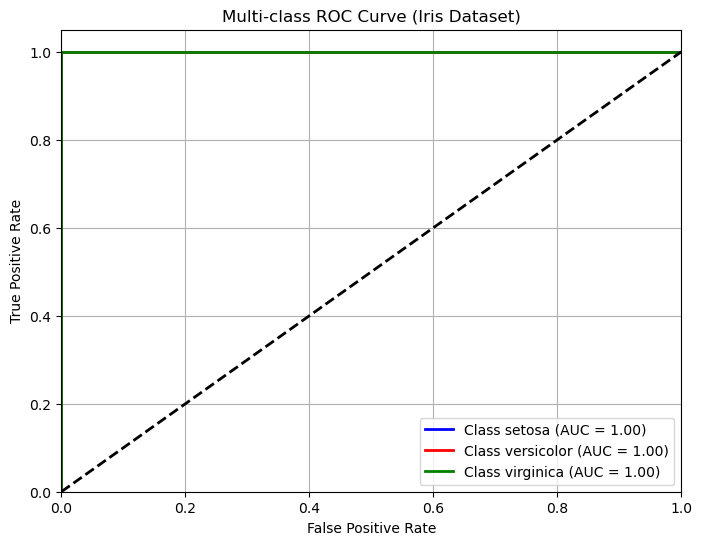

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(np.unique(y))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model with original labels
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Binarize the test labels for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.predict_proba(X_test)  # returns list of arrays per class

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Iris Dataset)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# ✅ Step 1: Load a Multi-class Dataset (e.g., Iris)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target
class_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ✅ Step 2: Create a Reusable Evaluation Function

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

def evaluate_model(y_true, y_pred, y_proba, average='macro'):
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision ({average}): {precision_score(y_true, y_pred, average=average):.3f}")
    print(f"Recall ({average}): {recall_score(y_true, y_pred, average=average):.3f}")
    print(f"F1 Score ({average}): {f1_score(y_true, y_pred, average=average):.3f}")
    print(f"Cohen's Kappa: {cohen_kappa_score(y_true, y_pred):.3f}")
    
    if y_proba is not None:
        y_true_bin = label_binarize(y_true, classes=list(set(y_true)))
        auc_macro = roc_auc_score(y_true_bin, y_proba, average="macro", multi_class="ovr")
        print(f"ROC AUC Score (macro): {auc_macro:.3f}")


# ✅ Step 3: Train Model and Evaluate


In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

evaluate_model(y_test, y_pred, y_proba)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.000
Precision (macro): 1.000
Recall (macro): 1.000
F1 Score (macro): 1.000
Cohen's Kappa: 1.000
ROC AUC Score (macro): 1.000


# ✅ Step 4: Plot Multi-Class ROC Curve


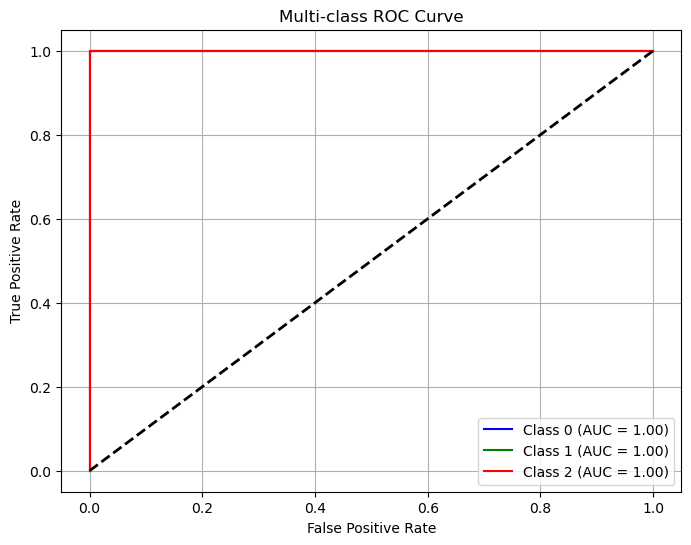

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Step 5: Plot Multi-class Precision-Recall Curves


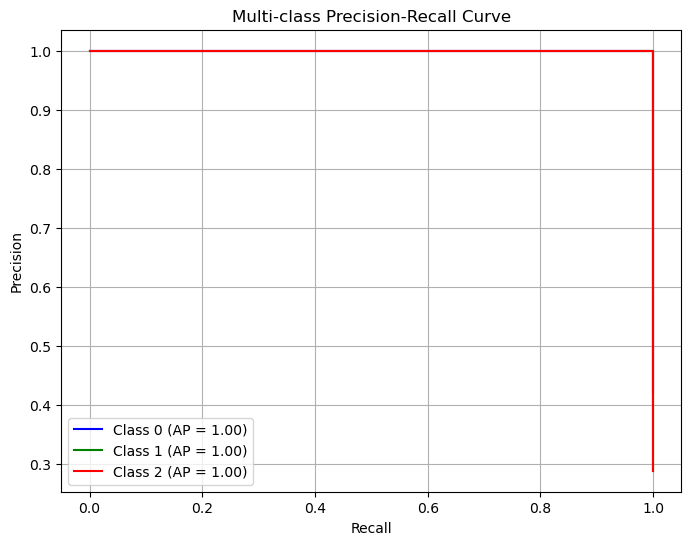

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Compute Precision-Recall and average precision for each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_proba[:, i])

# Plot all PR curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for i in range(n_classes):
    plt.plot(recall[i], precision[i], color=colors[i],
             label=f'Class {i} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()
